In [94]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math
from scipy.stats import multivariate_normal
%matplotlib inline

### Построим 3D график плотности случайного вектора $\xi = (\xi_1, \xi_2) \sim N(a, \Sigma)$,
### где $a = (0, 0)$ ,    
### $\Sigma = \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix} \qquad$ 

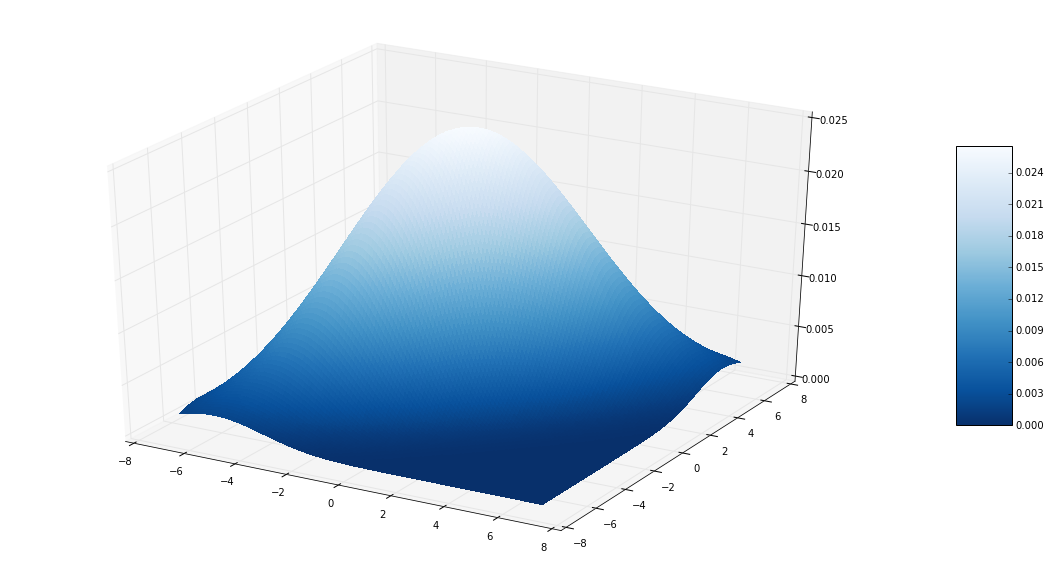

In [93]:
grid = np.mgrid[-7:7:0.1, -7:7:0.1]

from mpl_toolkits.mplot3d import Axes3D

# плотность распределения
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[0, 0], cov=[[10, 8], [8, 10]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[1].shape[1])])

fig = plt.figure(figsize=(20, 10))


ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], density, rstride=1, cstride=1, cmap='Blues_r',
                       linewidth=0, antialiased=False)

ax.set_zlim(0, 0.025)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Строим график условного распределения $f_{\xi | \eta}(x | y)$ для $y\in\{-3, 0, 1, 5\}$.  
### Пользуясь равенством $f_{\xi | \eta}(x | y_0) = \frac {f_{\xi , \eta}(x , y_0)}{f_{\eta}(y_0)}$, находим условную плотность.
### Из матрицы ковариаций находим, что матожидание $\eta$ равно $0$, а дисперсия равна $10$

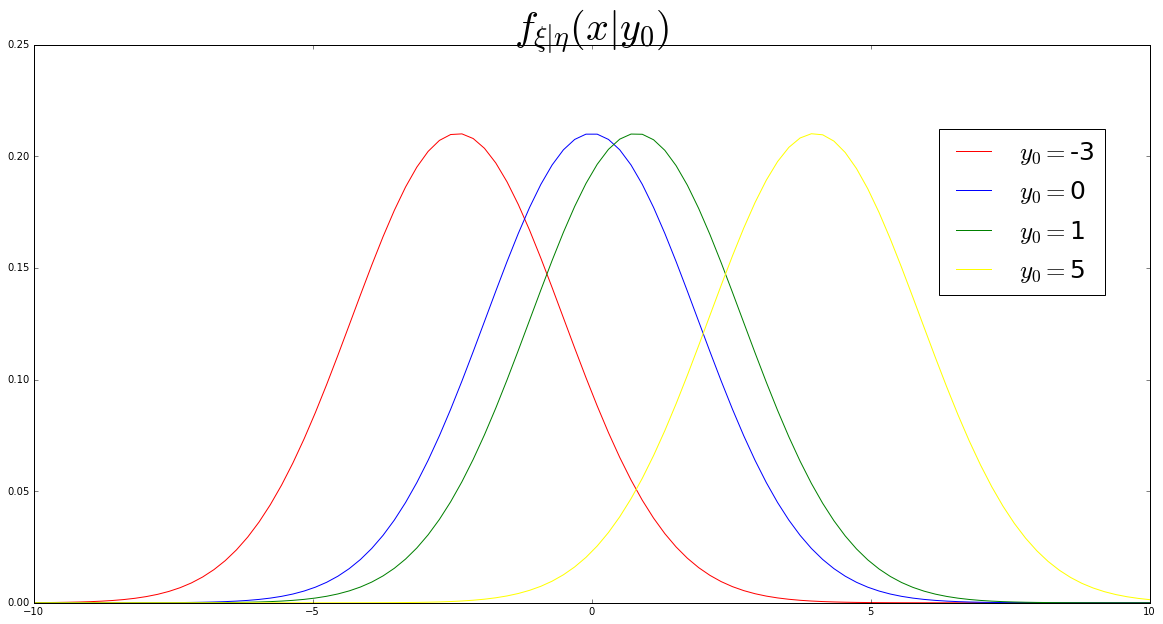

In [192]:
colors = ['red', 'blue', 'green', 'yellow']

cond_grid = np.linspace(-10, 10, 100)
plt.figure(figsize=(20, 10))
plt.title(r'$f_{\xi | \eta}(x | y_0)$', fontsize=40)

i = 0
for y_0 in [-3, 0, 1, 5]:

    # значение плотности распределения в точке у_0
    density_y_0 = sps.norm.pdf(np.linspace(y_0, y_0, 100), loc=0, scale=math.sqrt(10))

    # условная плотность распределения
    x_density = sps.multivariate_normal.pdf(np.array([cond_grid, np.linspace(y_0, y_0, 100)]).T, 
                            mean=[0, 0], cov=[[10, 8], [8, 10]])

    # строим график!:)
    plt.plot(cond_grid, x_density /  density_y_0 , colors[i], label='$y_0=$' + str(y_0))
    i = i + 1

plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.7), fontsize=25)
plt.show()
    

#### Посчитаем условное мотожидание $E(\xi_1 | \xi_2)$, 
#### $\xi_1, \xi_2$ - случайные величины с нормальным распределением, $=>$ если их ковариация равна нулю, 
#### то они независимы, представим $\xi_1$ в виде $\alpha\xi_1 + \beta\xi_2$ так, чтобы
#### $cov(\xi_1, \xi_2) = cov(\alpha\xi_1 + \beta\xi_2, \xi_2) = 0$, тогда
#### $E(\xi_1|\xi_2) = E(\alpha\xi_1 + \beta\xi_2|\xi_2) = \alpha E(\xi_1|\xi_2) +  \beta E(\xi_2|\xi_2) = \alpha E(\xi_1|\xi_2) + \beta\xi_2$
#### А с друой стороны, так как $\xi_1$ и $\xi_2$ независимы, то
#### $E(\xi_1|\xi_2) = E\xi_1$. Значит, $E(\xi_1|\xi_2) = \frac{E\xi_1 - \beta\xi_2}{\alpha}$
#### $cov(\xi_1, \xi_2) = cov(5\xi_1 - 4\xi_2, \xi_2) = 5cov(\xi_1, \xi_2) - 4cov(\xi_2, \xi_2) = 5\cdot8 - 4\cdot10 = 0 =>$
#### $E(\xi_1|\xi_2) = \frac{E\xi_1 + 4\xi_2}{5}$, так как $E\xi_1 = 0$, значит 
## $E(\xi_1|\xi_2) = \frac{4\xi_2}{5}$

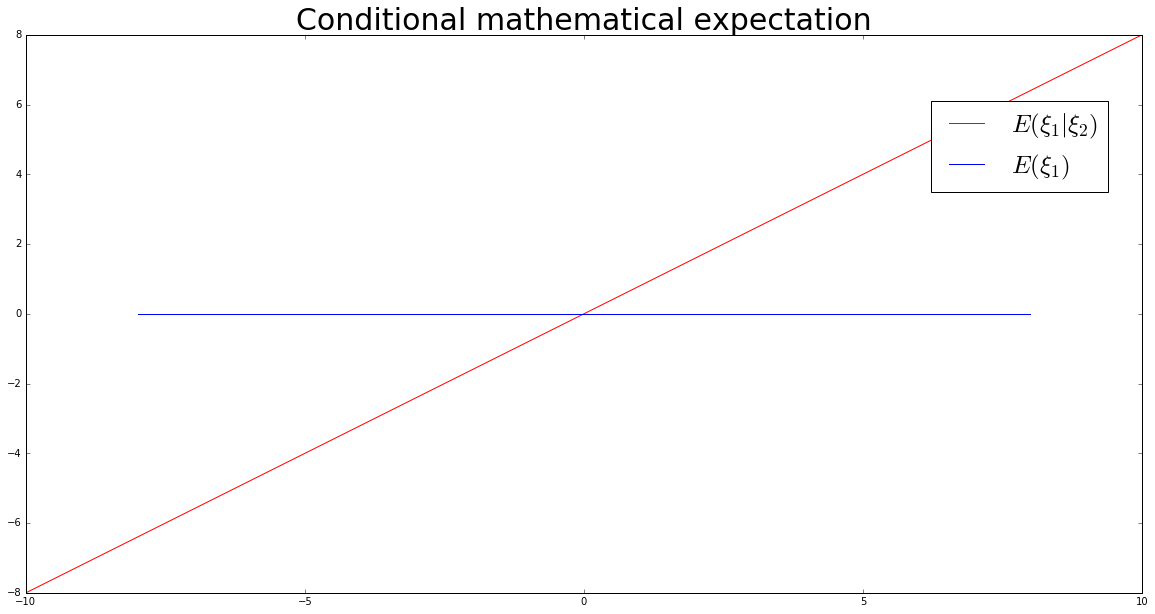

In [189]:

plt.figure(figsize=(20, 10))
plt.title('Conditional mathematical expectation', fontsize=30)

# рисуем график условного мат ожидания
plt.plot(np.linspace(-10, 10, 1000), np.linspace(-8, 8, 1000), color='red', label=r'$E(\xi_1|\xi_2)$')

# проводим прямую матожидание кси 1
plt.plot( np.linspace(-8, 8, 1000), np.linspace(0, 0, 1000), color='blue', label=r'$E(\xi_1)$')
plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.8), fontsize=25)